In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

Загрузка и знакомство с данными

In [65]:
# https://www.kaggle.com/datasets/krishujeniya/heart-diseae

df = pd.read_csv('../data/heart-disease.csv')

In [66]:
# вывести 5 первых строк таблицы
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
# вывести 5 последних строк таблицы
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [68]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
# вывести сводную таблицу статистик в транспонированном виде
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


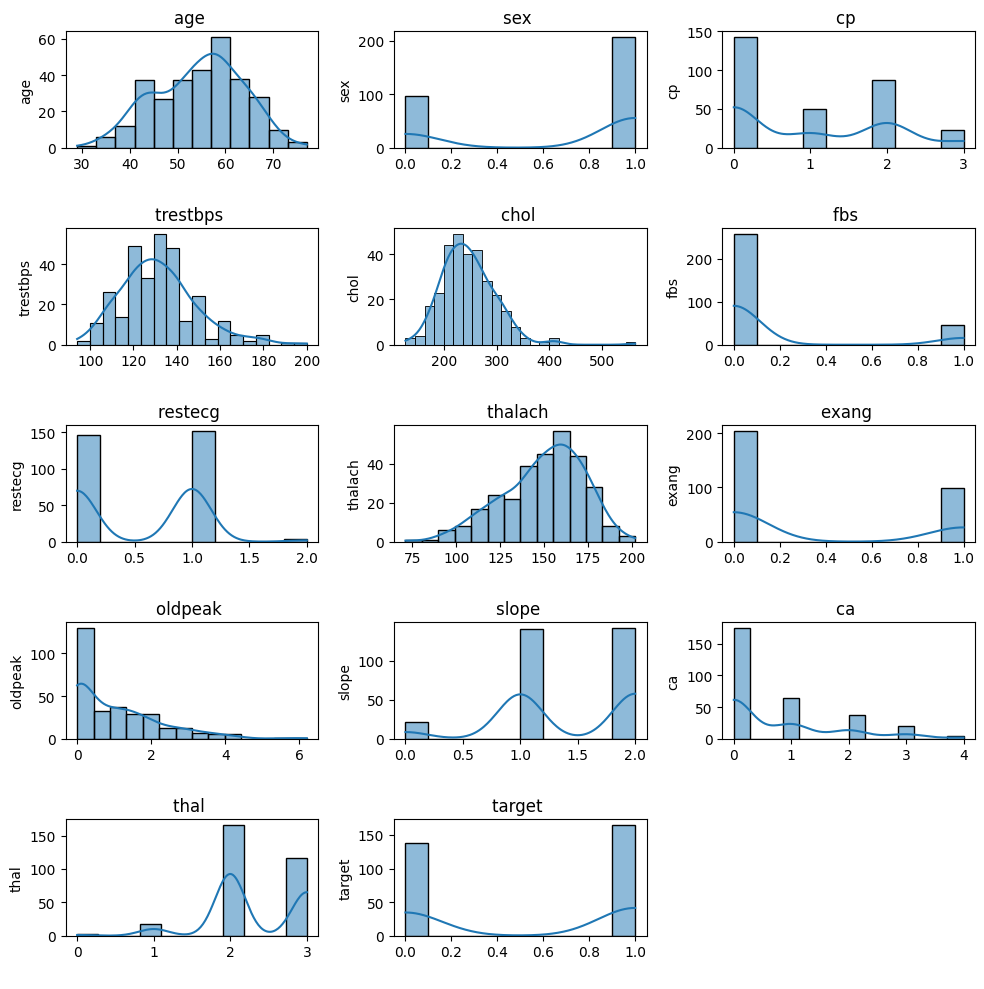

In [70]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

plt.show();

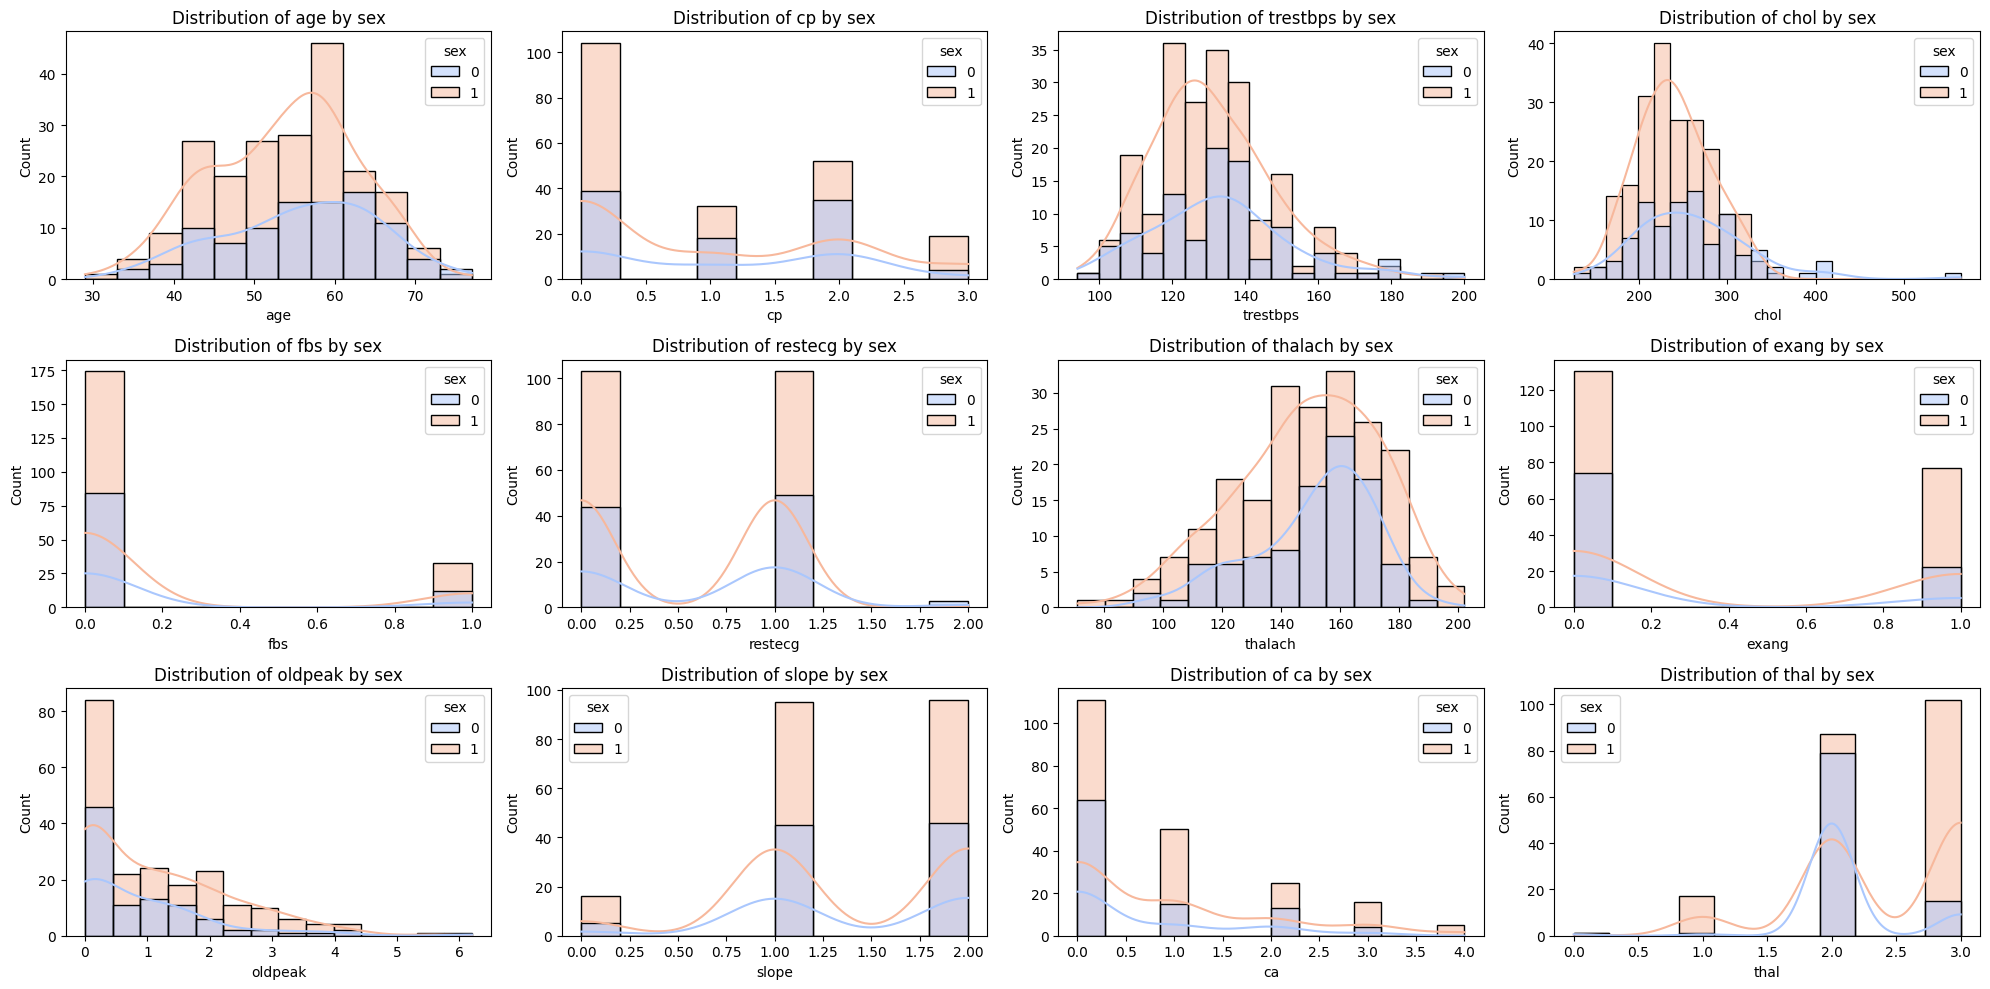

In [71]:
dist = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
plt.figure(figsize=(20,10))
for i,a  in enumerate(dist):
    plt.subplot(3,4,i+1)
    sns.histplot(data = df, x = a, hue ='sex', kde = True, palette='coolwarm')
    plt.title(f"Distribution of {a} by sex")
plt.tight_layout()
plt.show()

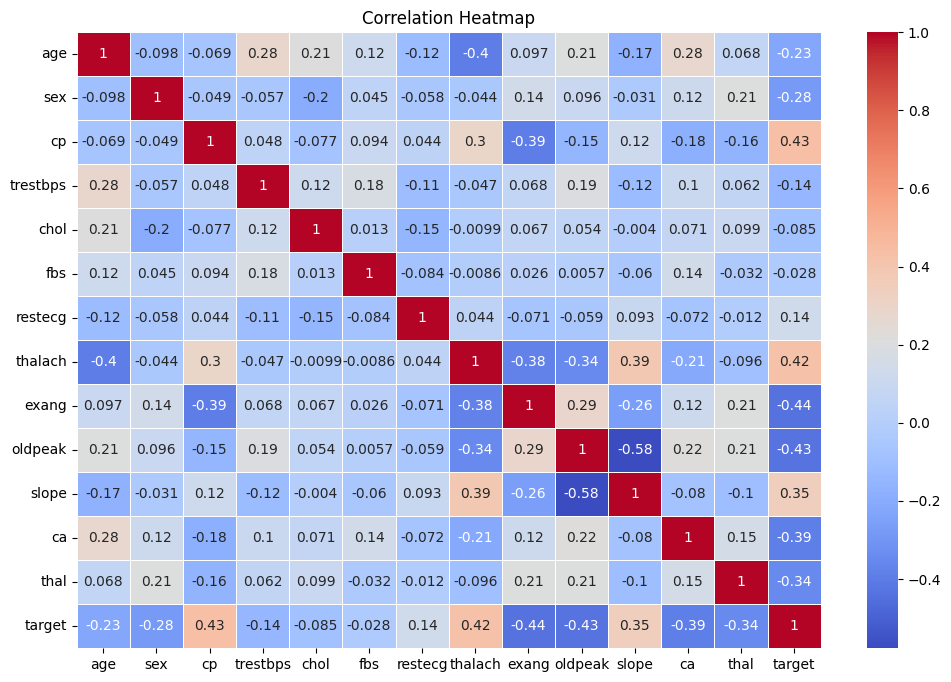

In [72]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')

In [22]:
df['age'] = df['age'].astype('int8')
df['trestbps'] = df['trestbps'].astype('int16')
df['chol'] = df['chol'].astype('int16')
df['thalach'] = df['thalach'].astype('int16')

In [23]:
df['oldpeak'] = df['oldpeak'].astype('float16')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.000000,61.000000,77.000000
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.000000,140.000000,200.000000
chol,303.0,246.264026,51.830751,126.0,211.0,240.000000,274.500000,564.000000
thalach,303.0,149.646865,22.905161,71.0,133.5,153.000000,166.000000,202.000000
oldpeak,303.0,1.040039,1.161133,0.0,0.0,0.799805,1.599609,6.199219


In [54]:
print("Duplicate values:")
print(df.duplicated().sum())
print("Missing values:")
print(df.isnull().sum().sum())
print("Missing values for each columns:")
print(df.isnull().sum())

Duplicate values:
1
Missing values:
0
Missing values for each columns:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [30]:
# удаление строк-дублакитов данных
df = df.drop_duplicates()

In [31]:
df.duplicated().sum()

0

In [32]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int8    
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trestbps  302 non-null    int16   
 4   chol      302 non-null    int16   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalach   302 non-null    int16   
 8   exang     302 non-null    category
 9   oldpeak   302 non-null    float16 
 10  slope     302 non-null    category
 11  ca        302 non-null    category
 12  thal      302 non-null    category
 13  target    302 non-null    category
dtypes: category(9), float16(1), int16(3), int8(1)
memory usage: 9.0 KB


In [33]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [34]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [35]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

sex - numer of unique = 2
cp - numer of unique = 4
fbs - numer of unique = 2
restecg - numer of unique = 3
exang - numer of unique = 2
slope - numer of unique = 3
ca - numer of unique = 5
thal - numer of unique = 4
target - numer of unique = 2


In [36]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in sex: sex
1    206
0     96
Name: count, dtype: int64
Unique categories in cp: cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
Unique categories in fbs: fbs
0    257
1     45
Name: count, dtype: int64
Unique categories in restecg: restecg
1    151
0    147
2      4
Name: count, dtype: int64
Unique categories in exang: exang
0    203
1     99
Name: count, dtype: int64
Unique categories in slope: slope
2    141
1    140
0     21
Name: count, dtype: int64
Unique categories in ca: ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
Unique categories in thal: thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64
Unique categories in target: target
1    164
0    138
Name: count, dtype: int64


# Очистка данных
очистка даннных проводится не будет

# Анализ признаков для модели

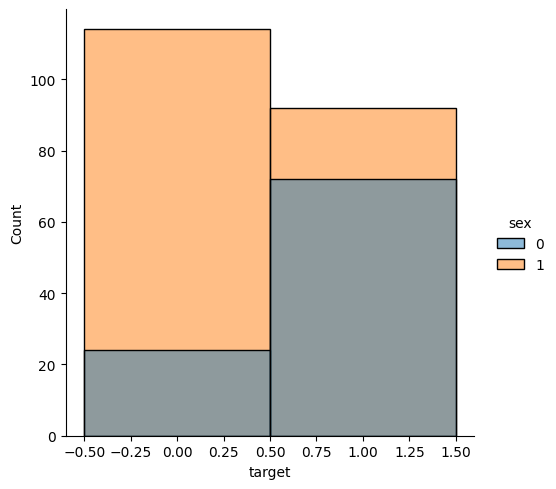

In [37]:
sns.displot(df, x='target', bins=100, hue='sex', log_scale=True)

0 - женщины, 1 - мужчины. Вывод: у мужчин сердечные заболевания встречаются чаще, чем у женщин

<Axes: >

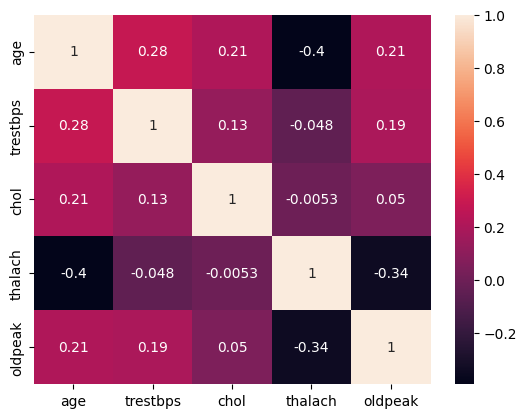

In [38]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

Вывод: корреляция признаков слабая. Только у максимальной частотой сердечных сокращений (thalach) с возрастом (age) и депрессией ST (oldpeak) наблюдается некоторая корреляция.  

In [39]:
import plotly.express as px 
fig=px.box(df,x='cp',y='age',color='cp',title='Тип боли/возраст')
fig.update_layout(
     title={
         'y':0.9,
         'x':0.5,
         'xanchor':'center',
         'yanchor':'top'
     }
)
fig.show()

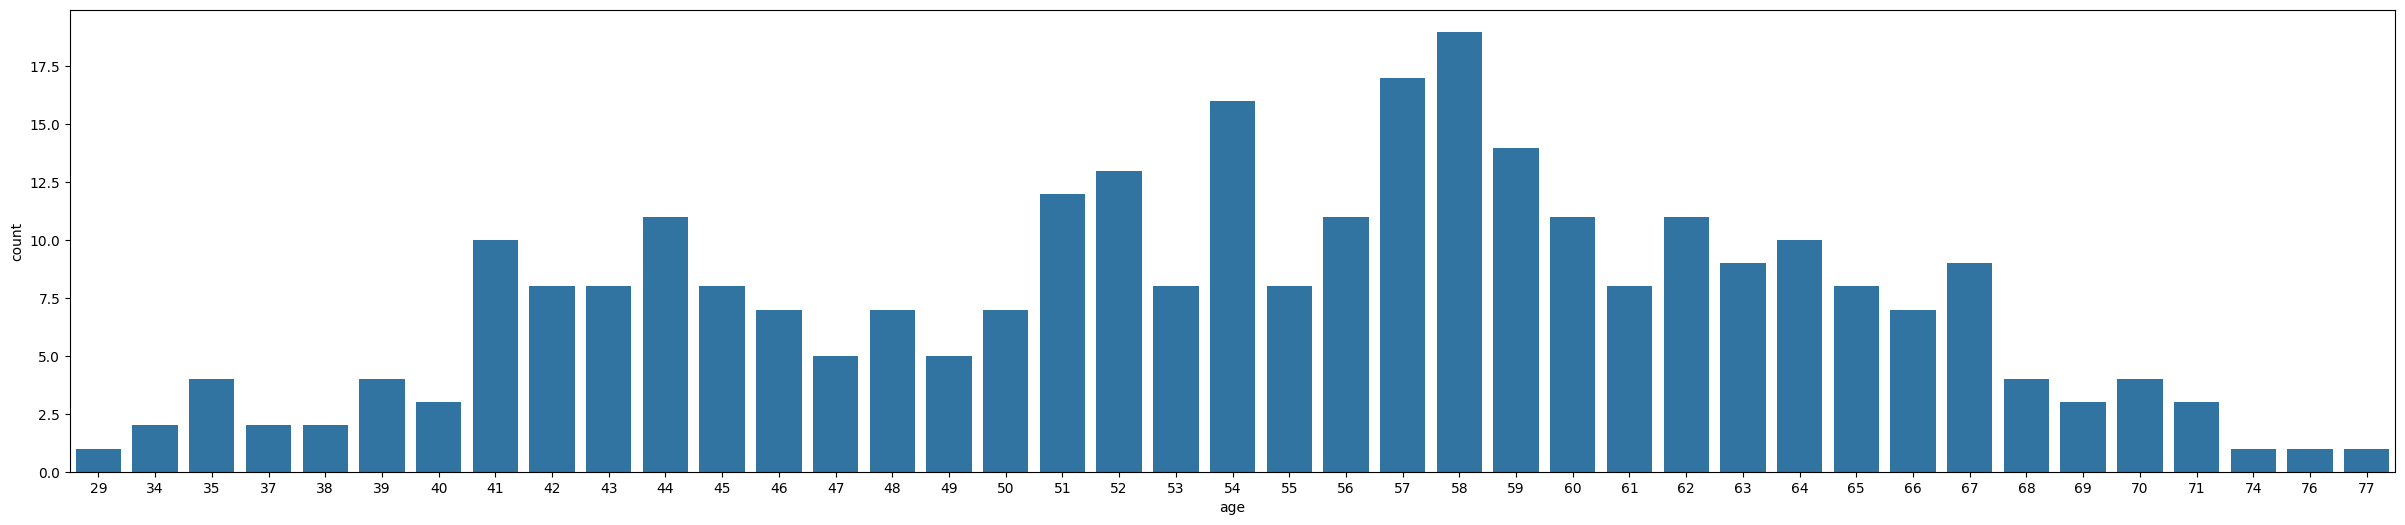

In [46]:
plt.figure(figsize=(30,6))
sns.countplot(x='age', data=df)
plt.show()

In [40]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
from bokeh.io.export import get_screenshot_as_png

output_notebook()

Loading BokehJS ...

In [41]:
source = ColumnDataSource(data=df.sample(frac=1))
p = figure(width=1000)
p.scatter(source=source, x='chol', y='age')
hover = HoverTool(tooltips=[('Возраст', '@age'),
                              ('Холестерин', '@chol'),
                              ('Стенокардия', '@exang'),
                              ('Сердечное заболевание', '@target')])

p.add_tools(hover)
show(p)

# Сохранение финального датасета

In [42]:
df.to_pickle('../data/clean_data.pkl')